# Jia Zeng 8936740 - Lab 9
---

In [203]:
#import
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

##### Load data:

In [204]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

##### Data Exploration:

In [205]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print()
print('**Train Data:**')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('**Test Data:**')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('**Image Data Range:**')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>

**Train Data:**
Images: (60000, 28, 28)
Labels: (60000,)
**Test Data:**
Images: (10000, 28, 28)
Labels: (10000,)
**Image Data Range:**
Min: 0
Max: 255


##### Image looks like:

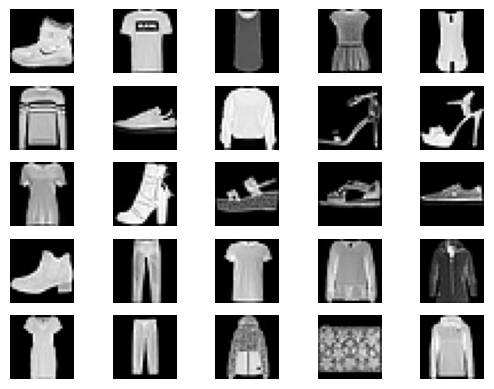

In [206]:
# plot the images in the training set in grayscale
for i in range(25): # the error text tell don't over 25
    plt.subplot(5, 5, i + 1)
    plt.axis('off')
    plt.imshow(train_images[i], cmap='gray') # Removed cmap=gray - Feels like airport scanning

##### Train a dense neural network using Keras:

In [207]:
train_images = train_images.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32") / 255

In [208]:
# define models
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [209]:
# define Loss Function, Optimizer and Metrics
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [210]:
# Training ("Fitting") the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


469/469 [==============================] - 4s 7ms/step - loss: 0.5585 - accuracy: 0.8011
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3863 - accuracy: 0.8595
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3398 - accuracy: 0.8752
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3135 - accuracy: 0.8846
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2940 - accuracy: 0.8911


##### Conclusions:

In [211]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

In [212]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_loss: {test_loss}")
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8715
test_loss: 0.35238608717918396
test_acc: 0.8715000152587891


In [213]:
predictions = model.predict(test_images)
prediction_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, prediction_labels)
print(cm)

313/313 [==============================] - 0s 1ms/step
[[777   0  32  54   1   2 130   0   4   0]
 [  0 974   0  20   2   0   3   0   1   0]
 [ 10   0 822  11  43   0 114   0   0   0]
 [  7   4  12 921  30   0  22   0   4   0]
 [  0   1 135  33 612   0 218   0   1   0]
 [  0   0   0   1   0 963   0  23   1  12]
 [ 82   0  73  48  29   0 758   0  10   0]
 [  0   0   0   0   0  16   0 961   0  23]
 [  5   0   7   5   0   1   9   4 969   0]
 [  0   0   0   1   0   4   1  36   0 958]]


In [214]:
incorrect_indices = np.where(test_labels != prediction_labels)[0]

##### Plot some examples of incorrect classifications:

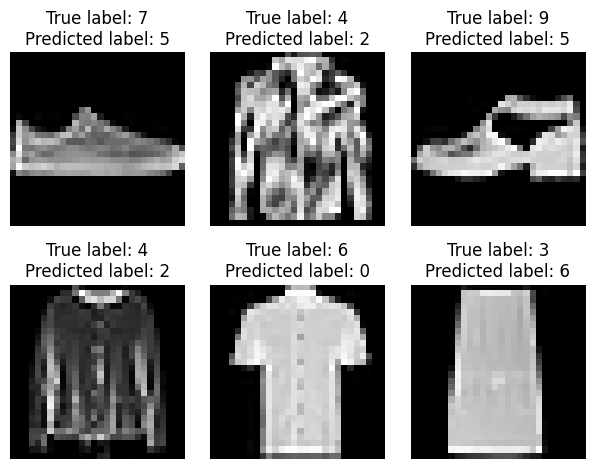

In [215]:
import textwrap
for i in range(6):
    index = incorrect_indices[i]
    predicted_label = prediction_labels[index]
    true_label = test_labels[index]

    title_text = f"True label: {true_label}\nPredicted label: {predicted_label}"
    title_text = textwrap.fill(title_text, 20)

    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[incorrect_indices[i]].reshape((28, 28)), cmap='gray')
    plt.title(title_text)
    plt.axis('off')
    plt.tight_layout()

---
# Magic code for Convert to HTML

jupyter nbconvert --to html ./students_submissions/8936740/Lab9.ipynb --output-dir ./docs/8936740 --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags="['noshow']"